<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
iowa_file = '../DSI-SF-2-alexhalcomb/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [4]:
print 'Rows : %s\nColumns : %s' % (iowa.shape[0], iowa.shape[1])
print iowa.info()

Rows : 270955
Columns : 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64

In [5]:
iowa.describe().T

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


In [6]:
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [7]:
iowa[iowa['County Number'].isnull()].head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
135,01/20/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,$3.22,$4.83,24,$115.92,9.0,2.38


In [8]:
iowa[iowa['Category'].isnull()].head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
6744,11/16/2015,4857,WEST BURLINGTON,52655,29.0,Des Moines,NaN,NaN,85,333,Jack Daniels TN Honey & Jack Daniels TN Fire 7...,1500,$15.07,$22.61,1,$22.61,1.5,0.4


In [9]:
iowa[iowa['Category Name'].isnull()].head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
896,02/05/2015,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,$23.58,$35.37,6,$212.22,4.5,1.19


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [10]:
# Null values are in the 'County Number','County','Category', and 'Category Name', 
# therefore these will need to be cleaned
#
# The 'Bottle Cost' columns contain dollar signs, and need to be converted to floats

### 3.2 Clean the columns

In [11]:
# Eliminate rows with null values
iowa_clean = iowa.dropna()

# Convert strings with dollar signs into floats

launder = lambda x: float(x.replace('$',''))

iowa_clean.loc[:,'State Bottle Cost'] = iowa.loc[:,'State Bottle Cost'].map(launder)
iowa_clean.loc[:,'State Bottle Retail'] = iowa.loc[:,'State Bottle Retail'].map(launder)
iowa_clean.loc[:,'Sale (Dollars)'] = iowa.loc[:,'Sale (Dollars)'].map(launder)

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
print 'Rows : %s\nColumns : %s' % (iowa_clean.shape[0], iowa_clean.shape[1])
print iowa_clean.info()

Rows : 269258
Columns : 18
<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null object
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null float64
County                   269258 non-null object
Category                 269258 non-null float64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null floa

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [351]:
iowa_clean.head(2)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Date_Time,Month,Year
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,2015-11-04,11,2015
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,2016-03-02,3,2016


In [13]:
# Methodology: 
# Step 1. Convert Date column to datetime format and extract Month and Year (put into new columns)
# Step 2. Filter total sales by store number, year, and month  to identify which stores had partial sales in 2015
# Step 3. Sum total sales and count total months, then annualize sales for stores that had partial sales 
# Conclusion: In order to make an apples to apples comparison w other stores, I normalized the problematic stores

# Add datetime formatted column
iowa_clean.loc[:,'Date_Time'] = pd.to_datetime(iowa_clean.loc[:,'Date'])

/Users/alexanderhalcomb/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [345]:
# Add column for month and year (switched everything to .loc bc of all those error messages!)
iowa_clean.loc[:,'Month'] = iowa_clean.loc[:,'Date_Time'].map(lambda x: x.month)
iowa_clean.loc[:,'Year'] = iowa_clean.loc[:,'Date_Time'].map(lambda x: x.year)

In [346]:
# Group by store number, year, and month. Look for total sales.
grouped_df = iowa_clean.groupby(['Store Number','Year','Month'])[['Sale (Dollars)']].sum()

In [352]:
grouped_df.head()

Sale (Dollars)
Store Number Year Month                
2106         2015 1            13567.80
                  2            12873.14
                  3            12846.35
                  4            11957.86
                  5             7526.88

In [353]:
# Count number of months in 2015 in which there were sales
subset_month = grouped_df.groupby(level=[0,1]).count().xs(2015,level=1)
subset_month = subset_month.rename(columns = {'Sale (Dollars)': 'Month'})

# Sum total sales in 2015, by store
subset_sales = grouped_df.groupby(level=[0,1]).sum().xs(2015,level=1)

# Combine into one df
result = subset_month.join(subset_sales)

# Add column with annualized sales for stores that closed early in 2015
result['Annualized Sale'] = result['Sale (Dollars)'] / (result['Month'] / 12)
result.head()

# Question - Is there a better way to do the above? Spun my wheels trying to filter the hierarchical index...

,Month,Sale (Dollars),Annualized Sale
Store Number,,,
2106,12,146038.70,146038.70
2113,12,9310.22,9310.22
2130,12,111583.91,111583.91
2152,12,7721.08,7721.08
2178,12,24324.18,24324.18


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [364]:
# Note - The below calculations do not include the annualization process done in Question 4

# Add columns for total cost, and then calculate total profit
iowa_clean.loc[:,'Cost (Dollars)'] = iowa_clean.loc[:,'State Bottle Cost'] * iowa_clean.loc[:,'Bottles Sold']
iowa_clean.loc[:,'Profit (Dollars)'] = iowa_clean.loc[:,'Sale (Dollars)'] - iowa_clean.loc[:,'Cost (Dollars)']

# Calculate yearly liquor sales for each store in 2015
iowa_clean[iowa_clean['Year'] == 2015].groupby(['Store Number'])[['Sale (Dollars)']].sum().head()

,Sale (Dollars)
Store Number,
2106,146038.70
2113,9310.22
2130,111583.91
2152,7721.08
2178,24324.18


### 5.2 Calculate the profit each store is making in 2015.


In [366]:
# Calculate profit for each store in 2015
iowa_clean[iowa_clean['Year'] == 2015].groupby(['Store Number'])[['Profit (Dollars)']].sum().head()

,Profit (Dollars)
Store Number,
2106,48742.20
2113,3109.04
2130,37229.32
2152,2587.53
2178,8165.70


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [416]:
county_df = iowa_clean[iowa_clean['Year'] == 2015].groupby(['County'])[['Cost (Dollars)','Sale (Dollars)',
                                                            'Profit (Dollars)','Volume Sold (Gallons)']].sum()

county_df['Profit / Gallon'] = county_df['Profit (Dollars)'] / county_df['Volume Sold (Gallons)']

county_df.sort_values('Profit / Gallon', ascending=False).head(10)

,Cost (Dollars),Sale (Dollars),Profit (Dollars),Volume Sold (Gallons),Profit / Gallon
County,,,,,
Dallas,333037.75,500766.01,167728.26,7927.89,21.156734
Johnson,1144423.49,1718425.51,574002.02,27958.19,20.530729
Polk,4252709.11,6386721.54,2134012.43,109269.47,19.529814
Scott,1359485.16,2041085.70,681600.54,35216.02,19.354843
Jefferson,55663.96,83560.91,27896.95,1446.20,19.289829
Des Moines,256591.07,385621.77,129030.70,6808.22,18.952193
Woodbury,666116.18,1000327.36,334211.18,17823.96,18.750669
Washington,95845.78,143907.46,48061.68,2569.91,18.701698
Buena Vista,115451.24,173439.66,57988.42,3111.79,18.635069


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

[[ 1.          0.44732444]
 [ 0.44732444  1.        ]]


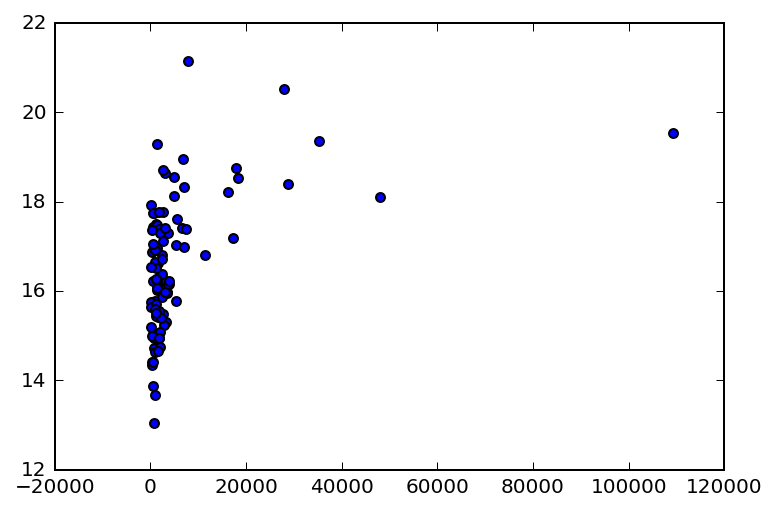

In [421]:
import matplotlib.pyplot as plt

X = county_df['Volume Sold (Gallons)']
y = county_df['Profit / Gallon']

print np.corrcoef(X,y)
plt.scatter(X,y)
plt.show()

# Profit tends to increase with store size

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [482]:
# Check unique categories 
iowa_clean['Category Name'].value_counts().head()

VODKA 80 PROOF               35256
CANADIAN WHISKIES            26967
STRAIGHT BOURBON WHISKIES    15290
SPICED RUM                   14575
VODKA FLAVORED               13931
Name: Category Name, dtype: int64

In [493]:
# Question - Is there a more efficient way to do this? 

def new_cats(x):
    x = x.lower()
    if 'whiskies' in x or 'whisky' in x or 'bourbon' in x:
        return 'Whisky'
    elif 'scotch' in x:
        return 'Scotch'
    elif 'rum' in x:
        return 'Rum'
    elif 'vodka' in x:
        return 'Vodka'  
    elif 'gin' in x:
        return 'Gin' 
    elif 'tequila' in x:
        return 'Tequila'
    elif 'liqueur' in x:
        return 'Liqueur'   
    elif 'creme' in x:
        return 'Liqueur'
    elif 'brandies' in x:
        return 'Brandy'   
    elif 'cocktail' in x:
        return 'Cocktail' 
    elif 'schnapps' in x:
        return 'Schnapps' 
    else:
        return 'Other'

iowa_clean.loc[:,'Broad Category Name'] = iowa_clean.loc[:,'Category Name'].map(new_cats)
iowa_clean['Broad Category Name'].value_counts()

Whisky      70890
Vodka       69690
Rum         32618
Liqueur     29423
Brandy      14978
Schnapps    13599
Tequila     12044
Gin          9882
Cocktail     6883
Other        6071
Scotch       3180
Name: Broad Category Name, dtype: int64

### 5.7 Do relationships exist between the broader liquor type and profit?

In [499]:
# Absolutely. 
# Question - Is there a good way to create a df (one operation) that includes the group by above (sum of each category) 
# and below (mean of profit / gallon for each category)?

iowa_clean.loc[:,'Profit / Gallon'] = iowa_clean.loc[:,'Profit (Dollars)'] / iowa_clean.loc[:,'Volume Sold (Gallons)']
iowa_clean.loc[:,['Profit / Gallon','Broad Category Name']]

iowa_clean.groupby(['Broad Category Name'])[['Profit / Gallon']].mean().sort_values('Profit / Gallon',ascending=False)

,Profit / Gallon
Broad Category Name,
Scotch,58.652497
Tequila,37.572061
Brandy,27.254403
Liqueur,26.528856
Whisky,25.527520
Other,19.886595
Rum,18.530535
Gin,18.435738
Vodka,18.208866


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [509]:
iowa_clean.head().T

,0,1,2,3,4
Date,11/04/2015,03/02/2016,02/11/2016,02/03/2016,08/18/2015
Store Number,3717,2614,2106,2501,3654
City,SUMNER,DAVENPORT,CEDAR FALLS,AMES,BELMOND
Zip Code,50674,52807,50613,50010,50421
County Number,9,82,7,85,99
County,Bremer,Scott,Black Hawk,Story,Wright
Category,1.0511e+06,1.0111e+06,1.0112e+06,1.0711e+06,1.03108e+06
Category Name,APRICOT BRANDIES,BLENDED WHISKIES,STRAIGHT BOURBON WHISKIES,AMERICAN COCKTAILS,VODKA 80 PROOF
Vendor Number,55,395,65,395,297
Item Number,54436,27605,19067,59154,35918


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [560]:
# Add column for quarter and year
def add_quarter(x):
    if x < 4:
        return 'Q1'
    elif x < 7:
        return 'Q2'
    elif x < 10:
        return 'Q3'
    else:
        return 'Q4'

iowa_clean.loc[:,'Quarter'] = iowa_clean.loc[:,'Month'].map(add_quarter) + iowa_clean.loc[:,'Year'].map(lambda x: str(x))

# Add columns for sales in Q12015 and Q12016
iowa_clean.loc[:,'Q12015 Sales'] = iowa_clean[iowa_clean.loc[:,'Quarter'] == 'Q12015'].loc[:,'Sale (Dollars)']
iowa_clean.loc[:,'Q12016 Sales'] = iowa_clean[iowa_clean.loc[:,'Quarter'] == 'Q12016'].loc[:,'Sale (Dollars)']

# Create new df for Q1 data only 
city_df = iowa_clean.groupby(['City'])[['Q12015 Sales','Q12016 Sales']].sum()

# Add column to show % increase in sales
city_df.loc[:,'% Increase'] = (city_df.loc[:,'Q12016 Sales'] / city_df.loc[:,'Q12015 Sales'] - 1) * 100

# Sort descending, drop rows that only had data for one quarter
city_df.sort_values('% Increase', ascending=False).dropna().head()

,Q12015 Sales,Q12016 Sales,% Increase
City,,,
OKOBOJI,11.21,944.98,8329.794826
HARPERS FERRY,60.12,883.47,1369.510978
STANWOOD,148.80,1615.68,985.806452
SULLY,60.84,593.88,876.134122
SCRANTON,121.44,959.01,689.698617


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?